In [1]:
import pandas as pd

In [6]:
names = ["Date", "Open", "High", "Low", "Close", "Volume"]
theta = 14
data = pd.read_csv('005930.csv', names=names)
data = data.drop([4286, 4287, 4288])
data

,Date,Open,High,Low,Close,Volume
0,2001-01-02,3160,3380,3140,3350,789127
1,2001-01-03,3229,3420,3220,3370,757143
2,2001-01-04,3790,3870,3660,3780,2398248
3,2001-01-05,3760,3920,3700,3900,1562744
4,2001-01-08,3820,3910,3780,3880,845911
...,...,...,...,...,...,...
4690,2019-12-23,56100,56400,55100,55500,9839252
4691,2019-12-24,55600,55700,54800,55000,11868463
4692,2019-12-26,54700,55400,54400,55400,9645034
4693,2019-12-27,55700,56900,55500,56500,12313056


In [7]:
data["U"]= 0
data["D"]= 0
data["AU"]= 0
data["AD"]= 0
data

,Date,Open,High,Low,Close,Volume,U,D,AU,AD
0,2001-01-02,3160,3380,3140,3350,789127,0,0,0,0
1,2001-01-03,3229,3420,3220,3370,757143,0,0,0,0
2,2001-01-04,3790,3870,3660,3780,2398248,0,0,0,0
3,2001-01-05,3760,3920,3700,3900,1562744,0,0,0,0
4,2001-01-08,3820,3910,3780,3880,845911,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4690,2019-12-23,56100,56400,55100,55500,9839252,0,0,0,0
4691,2019-12-24,55600,55700,54800,55000,11868463,0,0,0,0
4692,2019-12-26,54700,55400,54400,55400,9645034,0,0,0,0
4693,2019-12-27,55700,56900,55500,56500,12313056,0,0,0,0


In [8]:
for i in range(data.shape[0]):
    if i == 0:
        pass
    else:
        delta = data["Close"].iloc[i] - data["Close"].iloc[i-1]
        if delta >= 0:
            data["U"].iloc[i] = delta 
        else:
            data["D"].iloc[i] = -delta

C:\Users\kimyc\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
data.head(20)

,Date,Open,High,Low,Close,Volume,U,D,AU,AD
0,2001-01-02,3160,3380,3140,3350,789127,0,0,0,0
1,2001-01-03,3229,3420,3220,3370,757143,20,0,0,0
2,2001-01-04,3790,3870,3660,3780,2398248,410,0,0,0
3,2001-01-05,3760,3920,3700,3900,1562744,120,0,0,0
4,2001-01-08,3820,3910,3780,3880,845911,0,20,0,0
5,2001-01-09,3830,3860,3710,3840,925608,0,40,0,0
6,2001-01-10,3780,3810,3700,3710,824777,0,130,0,0
7,2001-01-11,3789,3789,3640,3640,628239,0,70,0,0
8,2001-01-12,3800,3890,3770,3840,1058060,200,0,0,0
9,2001-01-15,3860,4020,3840,3920,1029275,80,0,0,0


In [10]:
data["AU"].iloc[theta-1] = data["U"].iloc[:theta].mean()
data["AD"].iloc[theta-1] = data["D"].iloc[:theta].mean()
data.head(15)

,Date,Open,High,Low,Close,Volume,U,D,AU,AD
0,2001-01-02,3160,3380,3140,3350,789127,0,0,0.000000,0.000000
1,2001-01-03,3229,3420,3220,3370,757143,20,0,0.000000,0.000000
2,2001-01-04,3790,3870,3660,3780,2398248,410,0,0.000000,0.000000
3,2001-01-05,3760,3920,3700,3900,1562744,120,0,0.000000,0.000000
4,2001-01-08,3820,3910,3780,3880,845911,0,20,0.000000,0.000000
5,2001-01-09,3830,3860,3710,3840,925608,0,40,0.000000,0.000000
6,2001-01-10,3780,3810,3700,3710,824777,0,130,0.000000,0.000000
7,2001-01-11,3789,3789,3640,3640,628239,0,70,0.000000,0.000000
8,2001-01-12,3800,3890,3770,3840,1058060,200,0,0.000000,0.000000
9,2001-01-15,3860,4020,3840,3920,1029275,80,0,0.000000,0.000000


In [11]:
for i in range(theta, data.shape[0]):
    data["AU"].iloc[i] = (data["AU"].iloc[i-1] * 13 + data["U"].iloc[i] ) / 14
    data["AD"].iloc[i] = (data["AD"].iloc[i-1] * 13 + data["D"].iloc[i] ) / 14

In [12]:
data["RS"] = 0 
data["RSI"] = 0
data

,Date,Open,High,Low,Close,Volume,U,D,AU,AD,RS,RSI
0,2001-01-02,3160,3380,3140,3350,789127,0,0,0.000000,0.000000,0,0
1,2001-01-03,3229,3420,3220,3370,757143,20,0,0.000000,0.000000,0,0
2,2001-01-04,3790,3870,3660,3780,2398248,410,0,0.000000,0.000000,0,0
3,2001-01-05,3760,3920,3700,3900,1562744,120,0,0.000000,0.000000,0,0
4,2001-01-08,3820,3910,3780,3880,845911,0,20,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4690,2019-12-23,56100,56400,55100,55500,9839252,0,500,388.429201,202.965698,0,0
4691,2019-12-24,55600,55700,54800,55000,11868463,0,500,360.684258,224.182434,0,0
4692,2019-12-26,54700,55400,54400,55400,9645034,400,0,363.492526,208.169403,0,0
4693,2019-12-27,55700,56900,55500,56500,12313056,1100,0,416.100202,193.300160,0,0


In [25]:
for i in range(data.shape[0]):
    data["RS"].iloc[i] = data["AU"].iloc[i] / data["AD"].iloc[i]
    data["RSI"].iloc[i] = round(data["RS"].iloc[i] / (1 + data["RS"].iloc[i]) * 100, 2)

C:\Users\kimyc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\kimyc\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
data

,Date,Open,High,Low,Close,Volume,U,D,AU,AD,RS,RSI
0,2001-01-02,3160,3380,3140,3350,789127,0,0,0.000000,0.000000,NaN,NaN
1,2001-01-03,3229,3420,3220,3370,757143,20,0,0.000000,0.000000,NaN,NaN
2,2001-01-04,3790,3870,3660,3780,2398248,410,0,0.000000,0.000000,NaN,NaN
3,2001-01-05,3760,3920,3700,3900,1562744,120,0,0.000000,0.000000,NaN,NaN
4,2001-01-08,3820,3910,3780,3880,845911,0,20,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4690,2019-12-23,56100,56400,55100,55500,9839252,0,500,388.429201,202.965698,1.913768,66.0
4691,2019-12-24,55600,55700,54800,55000,11868463,0,500,360.684258,224.182434,1.608887,62.0
4692,2019-12-26,54700,55400,54400,55400,9645034,400,0,363.492526,208.169403,1.746138,64.0
4693,2019-12-27,55700,56900,55500,56500,12313056,1100,0,416.100202,193.300160,2.152612,68.0


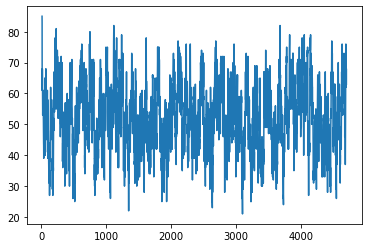

In [17]:
import matplotlib.pyplot as plt
plt.figure("RSI CHART")
plt.plot(data["RSI"])
plt.show()

In [18]:
print(f"RSI max : {data['RSI'].max()} \n RSI mean : {data['RSI'].min()}")

RSI max : 85.0 
 RSI mean : 21.0


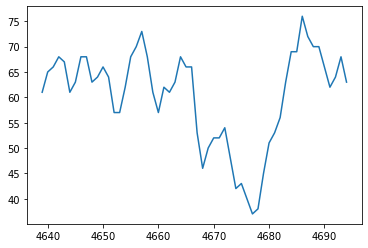

In [23]:
plt.figure("RSI CHART")
plt.plot(data["RSI"].iloc[4636:])
plt.show()

In [26]:
data.iloc[4636:]

,Date,Open,High,Low,Close,Volume,U,D,AU,AD,RS,RSI
4639,2019-10-11,49000,49450,48800,49150,7783275,600,0,328.445256,210.066804,1.563528,60.99
4640,2019-10-14,50000,50300,49850,50000,11130635,850,0,365.699166,195.062032,1.874784,65.21
4641,2019-10-15,49900,50200,49900,50100,6058105,100,0,346.720654,181.129030,1.914219,65.69
4642,2019-10-16,50700,50900,50400,50700,9136282,600,0,364.812036,168.191242,2.169031,68.44
4643,2019-10-17,50500,50600,50100,50500,6701380,0,200,338.754034,170.463296,1.987255,66.52
4644,2019-10-18,50300,50900,49650,49900,8483106,0,600,314.557317,201.144489,1.563838,61.00
4645,2019-10-21,49900,50400,49800,50300,4406531,400,0,320.660366,186.777026,1.716808,63.19
4646,2019-10-22,50800,51500,50700,51200,10898729,900,0,362.041768,173.435810,2.087468,67.61
4647,2019-10-23,51300,51500,50800,51200,8663880,0,0,336.181642,161.047538,2.087468,67.61
4648,2019-10-24,52500,52500,50500,50700,21185785,0,500,312.168667,185.258428,1.685044,62.76


In [17]:
data.head(20)

,Date,Open,High,Low,Close,Volume,U,D,AU,AD,RS,RSI
0,2001-01-02,3160,3380,3140,3350,789127,190,0,0.000000,0.000000,NaN,NaN
1,2001-01-03,3229,3420,3220,3370,757143,141,0,0.000000,0.000000,NaN,NaN
2,2001-01-04,3790,3870,3660,3780,2398248,0,10,0.000000,0.000000,NaN,NaN
3,2001-01-05,3760,3920,3700,3900,1562744,140,0,0.000000,0.000000,NaN,NaN
4,2001-01-08,3820,3910,3780,3880,845911,60,0,0.000000,0.000000,NaN,NaN
5,2001-01-09,3830,3860,3710,3840,925608,10,0,0.000000,0.000000,NaN,NaN
6,2001-01-10,3780,3810,3700,3710,824777,0,70,0.000000,0.000000,NaN,NaN
7,2001-01-11,3789,3789,3640,3640,628239,0,149,0.000000,0.000000,NaN,NaN
8,2001-01-12,3800,3890,3770,3840,1058060,40,0,0.000000,0.000000,NaN,NaN
9,2001-01-15,3860,4020,3840,3920,1029275,60,0,0.000000,0.000000,NaN,NaN
